In [1]:
import liana 
import anndata
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
import anndata
import scanpy as sc
from liana.mt import rank_aggregate
from liana.mt import singlecellsignalr, connectome, cellphonedb, natmi, logfc, cellchat, geometric_mean
import numpy as np
from matplotlib.pyplot import figure
import math
from scipy.stats import wilcoxon
import seaborn as sns
import matplotlib.gridspec as grid_spec

%matplotlib inline

# Data PreProcessing

# Dataset 3: Pre and Post Drug Treatment Dataset

## Day 0

In [ ]:
matrix = pd.read_csv("../../data/GraphComm_Input/Pre_Post/Day0/matrix.csv",index_col=0)

matrix.index = [str(i).upper() for i in matrix.index.tolist()]

from scipy.stats import wilcoxon
import anndata
import scanpy as sc

index = matrix.index.tolist()

matrix = matrix.fillna(0)

adata = anndata.AnnData(matrix.transpose())

sc.pp.normalize_total(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)

meta = pd.DataFrame({"cell":adata.obs["leiden"].index.tolist(),"label":adata.obs["leiden"].tolist()})

meta.index = meta["cell"].tolist()

adata = anndata.AnnData(matrix.transpose())
adata.raw = adata
adata.obs = meta
adata.obs["label"] = adata.obs["label"].astype("category")
sc.tl.rank_genes_groups(adata, 'label')

<ipython-input-67-5c7cf8dafc1e>:13: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


         Falling back to preprocessing with `sc.pp.pca` and default params.


<ipython-input-67-5c7cf8dafc1e>:23: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


In [ ]:
connectome(adata,groupby="label",expr_prop=0)
connectome_df = adata.uns["liana_res"][["source","target","ligand","receptor","expr_prod"]].sort_values("expr_prod",ascending=False)
cellphonedb(adata,groupby="label")
cellphone_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_means"]].sort_values("lr_means",ascending=False)
cellchat(adata,groupby="label")
cellchat_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_probs"]].sort_values("lr_probs",ascending=False)

Generating ligand-receptor stats for 6778 samples and 14855 features
Generating ligand-receptor stats for 6778 samples and 14855 features
Generating ligand-receptor stats for 6778 samples and 14855 features


In [ ]:
day0_list = [connectome_df,cellphone_df,cellchat_df]

## Day 7 - replicate 1

In [ ]:
matrix = pd.read_csv("../../data/GraphComm_Input/Pre_Post/Day7_1/matrix.csv",index_col=0)

matrix.index = [str(i).upper() for i in matrix.index.tolist()]

from scipy.stats import wilcoxon
import anndata
import scanpy as sc

index = matrix.index.tolist()

matrix = matrix.fillna(0)

adata = anndata.AnnData(matrix.transpose())

sc.pp.normalize_total(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)

meta = pd.DataFrame({"cell":adata.obs["leiden"].index.tolist(),"label":adata.obs["leiden"].tolist()})

meta.index = meta["cell"].tolist()

adata = anndata.AnnData(matrix.transpose())
adata.raw = adata
adata.obs = meta
adata.obs["label"] = adata.obs["label"].astype("category")
sc.tl.rank_genes_groups(adata, 'label')

         Falling back to preprocessing with `sc.pp.pca` and default params.


<ipython-input-70-ddecc45062e1>:13: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
<ipython-input-70-ddecc45062e1>:23: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


In [ ]:
connectome(adata,groupby="label",expr_prop=0)
connectome_df = adata.uns["liana_res"][["source","target","ligand","receptor","expr_prod"]].sort_values("expr_prod",ascending=False)
cellphonedb(adata,groupby="label")
cellphone_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_means"]].sort_values("lr_means",ascending=False)
cellchat(adata,groupby="label")
cellchat_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_probs"]].sort_values("lr_probs",ascending=False)

Generating ligand-receptor stats for 4770 samples and 14573 features
Generating ligand-receptor stats for 4770 samples and 14573 features
Generating ligand-receptor stats for 4770 samples and 14573 features


In [ ]:
day7_rep1_list = [connectome_df,cellphone_df,cellchat_df]

## Day 7 - replicate 2

In [ ]:
#matrix = pd.read_csv("../data/GSE95025/GSM2494785_dge_mel_rep3.txt",sep="\t")
matrix = pd.read_csv("../../data/GraphComm_Input/Pre_Post/Day7_2/matrix.csv",index_col=0)

matrix.index = [str(i).upper() for i in matrix.index.tolist()]

from scipy.stats import wilcoxon
import anndata
import scanpy as sc

index = matrix.index.tolist()

matrix = matrix.fillna(0)

adata = anndata.AnnData(matrix.transpose())

#meta = pd.read_csv("../data/Pre_Post/GSE150949_metaData_with_lineage.txt",sep="\t")

sc.pp.normalize_total(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)

meta = pd.DataFrame({"cell":adata.obs["leiden"].index.tolist(),"label":adata.obs["leiden"].tolist()})

meta.index = meta["cell"].tolist()

adata = anndata.AnnData(matrix.transpose())
adata.raw = adata
adata.obs = meta
adata.obs["label"] = adata.obs["label"].astype("category")
sc.tl.rank_genes_groups(adata, 'label')
pval_df = pd.DataFrame.from_records(adata.uns["rank_genes_groups"]["pvals"])
pval_df.index = matrix.index.tolist()
cell_type_df = {}
for i in pval_df.columns.tolist():
    sub = pval_df[i]
    sub = sub[sub < 0.05]
    cell_type_df[i] = sub.index.tolist()

         Falling back to preprocessing with `sc.pp.pca` and default params.


<ipython-input-73-75e4e07a80c6>:14: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


<ipython-input-73-75e4e07a80c6>:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


In [ ]:
connectome(adata,groupby="label",expr_prop=0)
connectome_df = adata.uns["liana_res"][["source","target","ligand","receptor","expr_prod"]].sort_values("expr_prod",ascending=False)
cellphonedb(adata,groupby="label")
cellphone_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_means"]].sort_values("lr_means",ascending=False)
cellchat(adata,groupby="label")
cellchat_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_probs"]].sort_values("lr_probs",ascending=False)

Generating ligand-receptor stats for 3515 samples and 14362 features
Generating ligand-receptor stats for 3515 samples and 14362 features
Generating ligand-receptor stats for 3515 samples and 14362 features


In [36]:
day7_rep2_list = [connectome_df,cellphone_df,cellchat_df]

### pathway analysis

### get unique ligand receptor interactions

In [78]:
day0_list = [i[["ligand","receptor"]].drop_duplicates() for i in day0_list]
day7_rep1_list = [i[["ligand","receptor"]].drop_duplicates() for i in day7_rep1_list]
day7_rep2_list = [i[["ligand","receptor"]].drop_duplicates() for i in day7_rep2_list]

### for each method's result of each dataset, retrieve the top 50 interactions

In [80]:
day0_list = [i.head(100) for i in day0_list]
day7_rep1_list = [i.head(100) for i in day7_rep1_list]
day7_rep2_list = [i.head(100) for i in day7_rep2_list]


### for each method's result of each dataset, only retain intercell validated interactions

In [81]:
Omnipath_db = pd.read_csv("../../data/LR_database/consensus_Omnipath.csv",index_col=0)[["source","target"]].drop_duplicates()
Omnipath_db.columns = ["from","to"]
Omnipath_db = Omnipath_db.drop_duplicates()

In [84]:
day0_list = [pd.merge(i,Omnipath_db,left_on=["ligand","receptor"],right_on=["from","to"]) for i in day0_list]
day7_rep1_list = [pd.merge(i,Omnipath_db,left_on=["ligand","receptor"],right_on=["from","to"]) for i in day7_rep1_list]
day7_rep2_list = [pd.merge(i,Omnipath_db,left_on=["ligand","receptor"],right_on=["from","to"]) for i in day7_rep2_list]

day0_list = [i[["ligand","receptor"]] for i in day0_list]
day7_rep1_list = [i[["ligand","receptor"]] for i in day7_rep1_list]
day7_rep2_list = [i[["ligand","receptor"]] for i in day7_rep2_list]

### for each method, capture maximum # of unique interactions between top 100 CCC interactions between pre and post treatment datasets

In [86]:
pre_post_list = []
for i,j,k in zip(day0_list,day7_rep1_list,day7_rep2_list):
    day0_day7_rep1_common = pd.merge(i,j).shape[0]/100
    day0_day7_rep2_common = pd.merge(i,k).shape[0]/100
    pre_post_list.append(min(1-day0_day7_rep1_common,1-day0_day7_rep2_common))

### import GraphComm's results, perform same preprocessing

In [87]:
total_day7_1 = pd.read_csv("../../results/GraphComm_Output/Pre_Post/Day0/CCI.csv")[["Src","Dst"]]
total_day7_2 = pd.read_csv("../../results/GraphComm_Output/Pre_Post/Day7_1/CCI.csv")[["Src","Dst"]]
total_day0 = pd.read_csv("../../results/GraphComm_Output/Pre_Post/Day7_2/CCI.csv")[["Src","Dst"]]

total_day0 = pd.merge(total_day0,Omnipath_db,left_on=["Src","Dst"],right_on=["from","to"]).head(100)[["Src","Dst"]]
total_day7_1 = pd.merge(total_day7_1,Omnipath_db,left_on=["Src","Dst"],right_on=["from","to"]).head(100)[["Src","Dst"]]
total_day7_2 = pd.merge(total_day7_2,Omnipath_db,left_on=["Src","Dst"],right_on=["from","to"]).head(100)[["Src","Dst"]]

In [88]:
total_day0_day7_1 = pd.merge(total_day0,total_day7_1).shape[0]/100
total_day0_day7_2 = pd.merge(total_day0,total_day7_2).shape[0]/100

total_pre_post = min(1-total_day0_day7_1,1-total_day0_day7_2)

In [89]:
total_day0_day7_2

0.45

Text(0, 0.5, 'Fraction of Unique Interactions')

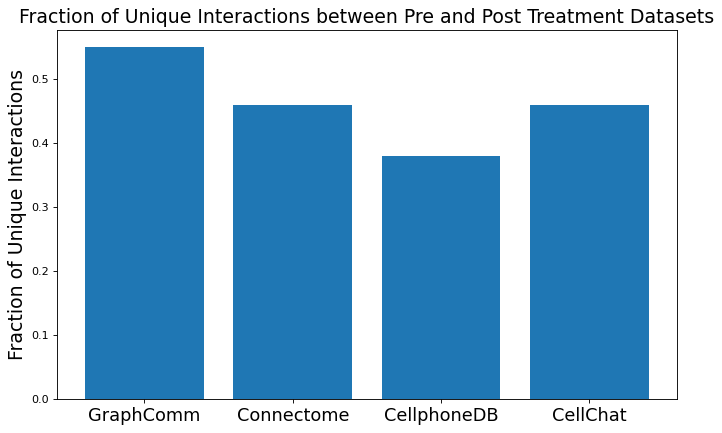

In [90]:
%matplotlib inline
from matplotlib.pyplot import figure
figure(figsize=(10,6), dpi=80)
plt.bar(["GraphComm","Connectome","CellphoneDB","CellChat"],[total_pre_post] + pre_post_list)
plt.xticks(fontsize=16)
plt.title("Fraction of Unique Interactions between Pre and Post Treatment Datasets",fontdict={'fontsize':17})
plt.ylabel("Fraction of Unique Interactions",fontdict={'fontsize':17})

## Dataset 5 - Spatial cardiovascular data (Fig 2E)

In [91]:
adata = sc.read_h5ad("../../data/raw_data/Cardiac_cells//Visium-FZ_GT_P19.h5ad")
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)
matrix = pd.DataFrame.sparse.from_spmatrix(adata.X,index=adata.obs.index.tolist(),columns=adata.var["feature_name"].tolist())

meta = pd.DataFrame({"cell":adata.obs.index.tolist(),"label":adata.obs["cell_type_original"].tolist()})
meta = meta[meta["label"] != "Lymphoid"]
meta.index = meta["cell"].tolist()

matrix = matrix.transpose()

matrix = matrix[meta.index.tolist()]

from scipy.stats import wilcoxon
import anndata
import scanpy as sc

index = matrix.index.tolist()

meta['label'] = meta["label"].astype("string").tolist()

meta["cell"] = meta["cell"].astype("category")
meta["label"] = meta["label"].astype("category")

matrix = matrix.loc[:,~matrix.columns.duplicated()].copy()
meta = meta.loc[~meta.index.duplicated(),:].copy()

adata = anndata.AnnData(matrix.transpose())
adata.raw = adata
adata.obs = meta
adata.obs["label"] = adata.obs["label"].astype("category")
sc.tl.rank_genes_groups(adata, 'label')

In [92]:
connectome(adata,groupby="label",expr_prop=0)
spatial_connectome_df = adata.uns["liana_res"][["source","target","ligand","receptor","expr_prod"]].sort_values("expr_prod",ascending=False)
cellphonedb(adata,groupby="label")
spatial_cellphone_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_means"]].sort_values("lr_means",ascending=False)
cellchat(adata,groupby="label")
spatial_cellchat_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_probs"]].sort_values("lr_probs",ascending=False)

Generating ligand-receptor stats for 3095 samples and 14078 features
Generating ligand-receptor stats for 3095 samples and 14078 features
Generating ligand-receptor stats for 3095 samples and 14078 features



### remove self-loops for cell groups

In [93]:
spatial_cellphone_df = spatial_cellphone_df[spatial_cellphone_df["source"] != spatial_cellphone_df["target"]]
spatial_cellchat_df = spatial_cellchat_df[spatial_cellchat_df["source"] != spatial_cellchat_df["target"]]
spatial_connectome_df = spatial_connectome_df[spatial_connectome_df["source"] != spatial_connectome_df["target"]]


### for each method's results, capture the top 10 unique cell group interactions

In [94]:
temp_cellphone_df = spatial_cellphone_df.drop_duplicates(["source","target"]).head(10)
temp_cellchat_df = spatial_cellchat_df.drop_duplicates(["source","target"]).head(10)
temp_connectome_df = spatial_connectome_df.drop_duplicates(["source","target"]).head(10)

### import GraphComm results, remove self loops and capture the top 10 unique cell group interactions

In [95]:
total_spatial = pd.read_csv("../../results/GraphComm_Output/Cardiac_cells/FZ_GT_P19/CCI.csv",index_col=0)
total_spatial = total_spatial[total_spatial["Src Cell"] != total_spatial["Dst Cell"]]
total_spatial = total_spatial.drop_duplicates(["Src Cell","Dst Cell"]).head(10)

### retrieve cell group spatial coordinates

In [96]:
adata = sc.read_h5ad("../../data/raw_data/Cardiac_cells/Visium-FZ_GT_P19.h5ad")


In [97]:
meta = pd.DataFrame({"cell":adata.obs.index.tolist(),"label":adata.obs["cell_type_original"].tolist()})
meta = meta[meta["label"] != "Lymphoid"]
meta.index = meta["cell"].tolist()

adata = adata[meta.index.tolist()]
spatial_coordinates = adata.obsm["X_spatial"]
spatial_df = pd.DataFrame({"x":spatial_coordinates[:,0],"y":spatial_coordinates[:,1]},index=meta.index.tolist())
cell_groups = meta["label"].unique().tolist()

### extract from each method, the average eucleadian distance for the top 10 cell group interactions

In [98]:
cellphone_spatial = []
for one,two in zip(temp_cellphone_df["source"].tolist(),temp_cellphone_df["target"].tolist()):
    cells = meta[meta["label"]==one].index.tolist()
    spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[cells]["x"].tolist(),spatial_df.loc[cells]["y"].tolist())]
    second_cells = meta[meta["label"]==two].index.tolist()
    second_spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[second_cells]["x"].tolist(),spatial_df.loc[second_cells]["y"].tolist())]
    min_list = []
    for k in spatial_coords:
        min_list.append(np.mean([math.dist(k,l) for l in second_spatial_coords]))
    cellphone_spatial.append(np.mean(min_list))


In [99]:
cellchat_spatial = []
for one,two in zip(temp_cellchat_df["source"].tolist(),temp_cellchat_df["target"].tolist()):
    cells = meta[meta["label"]==one].index.tolist()
    spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[cells]["x"].tolist(),spatial_df.loc[cells]["y"].tolist())]
    second_cells = meta[meta["label"]==two].index.tolist()
    second_spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[second_cells]["x"].tolist(),spatial_df.loc[second_cells]["y"].tolist())]
    min_list = []
    for k in spatial_coords:
        min_list.append(np.mean([math.dist(k,l) for l in second_spatial_coords]))
    cellchat_spatial.append(np.mean(min_list))


In [100]:
connectome_spatial = []
for one,two in zip(temp_connectome_df["source"].tolist(),temp_connectome_df["target"].tolist()):
    cells = meta[meta["label"]==one].index.tolist()
    spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[cells]["x"].tolist(),spatial_df.loc[cells]["y"].tolist())]
    second_cells = meta[meta["label"]==two].index.tolist()
    second_spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[second_cells]["x"].tolist(),spatial_df.loc[second_cells]["y"].tolist())]
    min_list = []
    for k in spatial_coords:
        min_list.append(np.mean([math.dist(k,l) for l in second_spatial_coords]))
    connectome_spatial.append(np.mean(min_list))


In [101]:
graphcomm_total_spatial = []
for one,two in zip(total_spatial["Src Cell"].tolist(),total_spatial["Dst Cell"].tolist()):
    cells = meta[meta["label"]==one].index.tolist()
    spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[cells]["x"].tolist(),spatial_df.loc[cells]["y"].tolist())]
    second_cells = meta[meta["label"]==two].index.tolist()
    second_spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[second_cells]["x"].tolist(),spatial_df.loc[second_cells]["y"].tolist())]
    min_list = []
    for k in spatial_coords:
        min_list.append(np.mean([math.dist(k,l) for l in second_spatial_coords]))
    graphcomm_total_spatial.append(np.mean(min_list))


### extract randomized iterations

In [102]:
df_list = []
for i in range(100):
    df_list.append(pd.read_csv(f"../../data/random_data/Cardiac_Cells/spatial_{i+1}_random.csv",index_col=0).drop_duplicates(["Src Cell","Dst Cell"]))

In [103]:
random_spatial = []
for i in df_list:
    temp_input = i
    input_spatial = []
    for one,two in zip(temp_input["Src Cell"].tolist(),temp_input["Dst Cell"].tolist()):
        cells = meta[meta["label"]==one].index.tolist()
        spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[cells]["x"].tolist(),spatial_df.loc[cells]["y"].tolist())]
        if two != one:
            second_cells = meta[meta["label"]==two].index.tolist()
            second_spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[second_cells]["x"].tolist(),spatial_df.loc[second_cells]["y"].tolist())]
            min_list = []
            for k in spatial_coords:
                min_list.append(np.mean([math.dist(k,l) for l in second_spatial_coords]))
            input_spatial.append(np.mean(min_list))
    random_spatial.append(input_spatial)


/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
/opt/conda/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars


In [104]:
new_random_spatial = []
for i in random_spatial:
    new_random_spatial.append([min([k for k in i if not np.isnan(k)]) if np.isnan(j) else j for j in i])

In [105]:
random_average = []
for i in range(10):
    random_average.append(np.mean([j[i] for j in new_random_spatial]))

In [106]:
x = [connectome_spatial,cellchat_spatial,cellphone_spatial,graphcomm_total_spatial]
comparison_labels = ['Connectome',"CellChat","CellPhone","GraphComm"]
df = pd.DataFrame(x, index=comparison_labels)


### visualize via ridgeline plot

In [107]:
df

,0,1,2,3,4,5,6,7,8,9
Connectome,0.508076,0.579552,0.437746,0.513490,0.433397,0.437746,0.484351,0.511083,0.496317,0.439119
CellChat,0.579552,0.508076,0.437746,0.513490,0.433397,0.511083,0.484351,0.475336,0.496317,0.385759
CellPhone,0.508076,0.579552,0.437746,0.385759,0.484351,0.511083,0.433397,0.437746,0.417550,0.475336
GraphComm,0.538530,0.538530,0.397472,0.662036,0.459234,0.436435,0.372023,0.489707,0.372023,0.447851


In [ ]:
df.median(axis=1)

Connectome    0.490334
CellChat      0.490334
CellPhone     0.456541
GraphComm     0.453542
dtype: float64

In [ ]:
colors = ['#0000ff', '#3300cc', '#660099', '#990066', '#cc0033', '#ff0000']

In [ ]:
graphcomm_total_df = pd.DataFrame([graphcomm_total_spatial], index=["GraphComm"]).transpose()
connectome_df= pd.DataFrame([connectome_spatial], index=["Connectome"]).transpose()
cellchat_df= pd.DataFrame([cellchat_spatial], index=["CellChat"]).transpose()
cellphone_df= pd.DataFrame([cellphone_spatial], index=["CellPhone"]).transpose()

In [ ]:
df_list = [connectome_df,cellchat_df,cellphone_df,graphcomm_total_df]

In [ ]:
random_df = pd.DataFrame([random_average]).T
random_df.columns = ["Random"]

In [ ]:
random_df.median()

Random    0.473624
dtype: float64

## scale randomization data

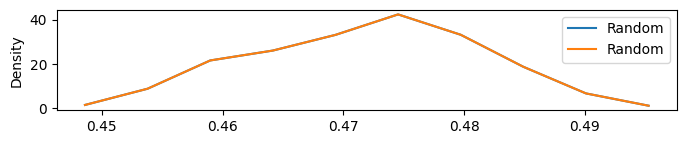

In [115]:
i = 0
gs = (grid_spec.GridSpec(len(comparison_labels),1))

fig = plt.figure(figsize=(8,6))
ax_objs = []
ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))
random_x = random_df.plot.kde(ax=ax_objs[-1],ind=10).get_children()[0]._x
random_y= random_df.plot.kde(ax=ax_objs[-1],ind=10).get_children()[0]._y
random_y = random_y / 4

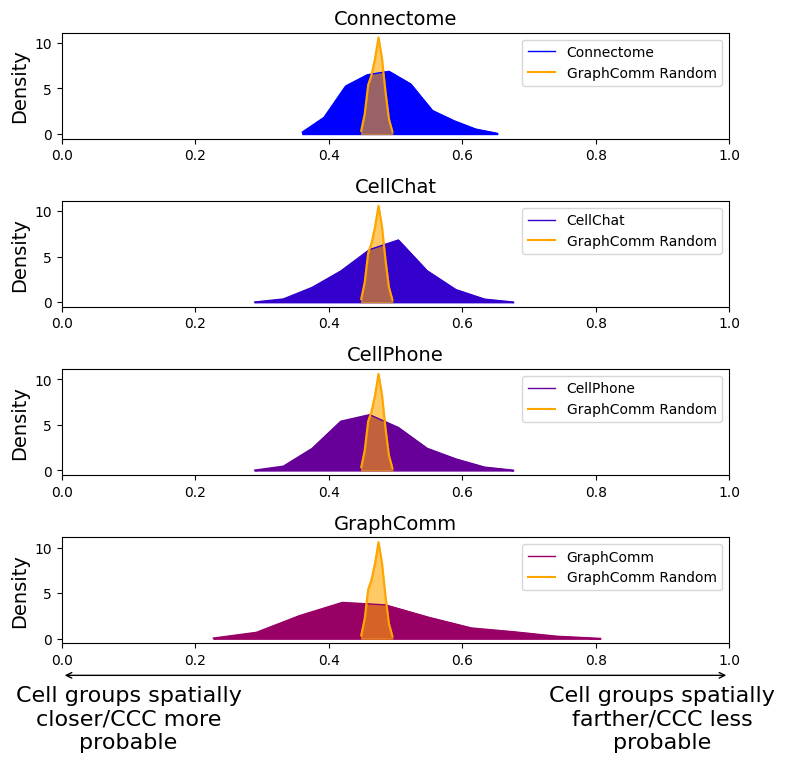

In [116]:
import matplotlib.gridspec as grid_spec
%matplotlib inline
gs = (grid_spec.GridSpec(len(comparison_labels),1))

fig = plt.figure(figsize=(8,8))

i = 0

#creating empty list
ax_objs = []

for df,label in zip(df_list,comparison_labels):
    # creating new axes object and appending to ax_objs
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))

    # plotting the distribution
    plot = (df.plot.kde(ax=ax_objs[-1],color=colors[i], lw=1,ind=10)
           )

    # grabbing x and y data from the kde plot
    x = plot.get_children()[0]._x
    y = plot.get_children()[0]._y
    ax_objs[-1].plot(random_x,random_y,color="orange",label="GraphComm Random")
    plot.legend()
    # filling the space beneath the distribution
    ax_objs[-1].fill_between(x,y,color=colors[i])
    ax_objs[-1].fill_between(random_x,random_y,color="orange",alpha=0.6)

    # setting uniform x and y lims
    ax_objs[-1].set_xlim(0,1)
    #ax_objs[-1].set_ylim(0,10)
    ax_objs[-1].set_title(label,fontdict={"fontsize":14})
    ax_objs[-1].set_ylabel("Density",fontdict={"fontsize":14})
    i += 1
plt.annotate('', xy=(0, -0.3), xycoords='axes fraction', xytext=(1, -0.3), 
            arrowprops=dict(arrowstyle="<->"))
plt.text(0.1,-12, 'Cell groups spatially\ncloser/CCC more\nprobable',ha="center",fontdict={"fontsize":16})
plt.text(0.9,-12, 'Cell groups spatially\nfarther/CCC less\nprobable',ha="center",fontdict={"fontsize":16})
plt.tight_layout()
plt.show()